PURPOSE OF THE PROJECT

Development of an accurate and reliable model that can predict the prices of automobiles based on various attributes and features. By utilizing the linear regression algorithm, this project aims to provide valuable insights and assistance to buyers, sellers, and industry professionals in making informed decisions regarding automobile pricing.

The primary objectives of this project include:

1.Data Analysis and Preprocessing.                                                                                                                    
2.Feature Selection and Engineering.                                                                                                                   
3.Model Development.                                                                                                                                   
4.Model Evaluation and Validation.                                                                                                                   
5.Interpretation and Insights.

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#Reading the Data_Set
carsales = pd.read_csv("Automobile_data.csv", index_col=0)
carsales

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0


In [3]:
carsales.info() #display all the information related to the Dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     object 
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.8+ KB


In [4]:
carsales.head() #print first 5 values of dataset

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [5]:
carsales.shape     #display the dimension of dataframe

(61, 9)

In [6]:
carsales.dtypes    #showing datatypes of the dataframe

company              object
body-style           object
wheel-base          float64
length              float64
engine-type          object
num-of-cylinders     object
horsepower            int64
average-mileage       int64
price               float64
dtype: object

In [7]:
carsales.isna().sum().to_frame()    #checking the sum of the number of null value as a frame design in Dataset

,0
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,0
horsepower,0
average-mileage,0
price,3


In [8]:
carsales.dropna(inplace= True)   #drop null values in dataset
carsales

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
5,audi,sedan,99.8,177.3,ohc,five,110,19,15250.0
6,audi,wagon,105.8,192.7,ohc,five,110,19,18920.0
9,bmw,sedan,101.2,176.8,ohc,four,101,23,16430.0
10,bmw,sedan,101.2,176.8,ohc,four,101,23,16925.0


In [9]:
# Column wise total null values
carsales.isnull().sum().to_frame().rename(columns={0:"Number of Missing Values"})

,Number of Missing Values
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,0
horsepower,0
average-mileage,0
price,0


In [10]:
carsales.select_dtypes(['object'])        # Object values in dataframe

,company,body-style,engine-type,num-of-cylinders
index,,,,
0,alfa-romero,convertible,dohc,four
1,alfa-romero,convertible,dohc,four
2,alfa-romero,hatchback,ohcv,six
3,audi,sedan,ohc,four
4,audi,sedan,ohc,five
5,audi,sedan,ohc,five
6,audi,wagon,ohc,five
9,bmw,sedan,ohc,four
10,bmw,sedan,ohc,four


In [11]:
carsales.select_dtypes(['int'])     # Integer values in dataframe

,horsepower,average-mileage
index,,
0,111,21
1,111,21
2,154,19
3,102,24
4,115,18
5,110,19
6,110,19
9,101,23
10,101,23


In [12]:
# Float values in dataframe
carsales.select_dtypes(['float'])

,wheel-base,length,price
index,,,
0,88.6,168.8,13495.0
1,88.6,168.8,16500.0
2,94.5,171.2,16500.0
3,99.8,176.6,13950.0
4,99.4,176.6,17450.0
5,99.8,177.3,15250.0
6,105.8,192.7,18920.0
9,101.2,176.8,16430.0
10,101.2,176.8,16925.0


In [13]:
# Printing all the unique values
columns = carsales.select_dtypes(['object']).columns
for col in columns:
    print(carsales[col].unique())
    #print(columns)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mitsubishi' 'nissan' 'porsche' 'toyota'
 'volkswagen' 'volvo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [14]:
columns

Index(['company', 'body-style', 'engine-type', 'num-of-cylinders'], dtype='object')

In [15]:
carsales.describe()

,wheel-base,length,horsepower,average-mileage,price
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,98.620690,173.646552,106.051724,25.534483,15387.000000
std,6.810589,14.005616,48.915402,7.932203,11320.259841
min,88.400000,141.100000,48.000000,13.000000,5151.000000
25%,94.500000,165.300000,68.000000,19.000000,6808.500000
50%,96.400000,171.450000,100.000000,24.500000,11095.000000
75%,101.800000,182.775000,122.500000,31.000000,18120.500000
max,120.900000,208.100000,262.000000,47.000000,45400.000000


In [16]:
carsales['company'].unique()    #list of Company name

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
carsales['company'].value_counts()   #counting the number cars in each company

toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
jaguar           3
dodge            2
porsche          2
volvo            2
isuzu            1
Name: company, dtype: int64

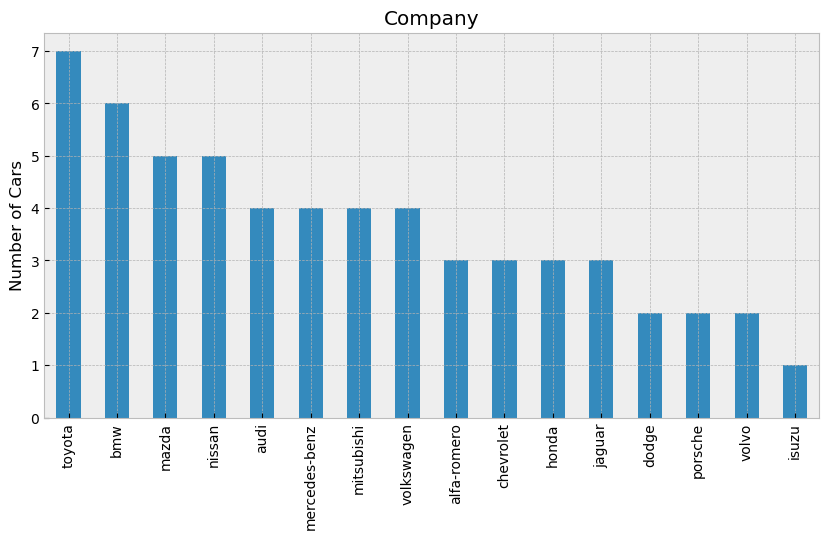

In [18]:
# Visualize Company column data

plt.figure(figsize=(10, 5))
plt.style.use('bmh')
carsales['company'].value_counts().plot(kind='bar')
plt.title('Company')
plt.ylabel('Number of Cars')
plt.xlabel('')
plt.show()

In [19]:
carsales['wheel-base'].unique()    #list of num-of-cylinders

array([ 88.6,  94.5,  99.8,  99.4, 105.8, 101.2, 103.5, 110. ,  88.4,
        93.7,  96.5,  94.3, 113. , 102. ,  93.1,  95.3, 104.9, 120.9,
       112. ,  96.3, 100.4,  89.5,  95.7, 104.5,  97.3, 104.3])

<Figure size 800x1000 with 0 Axes>

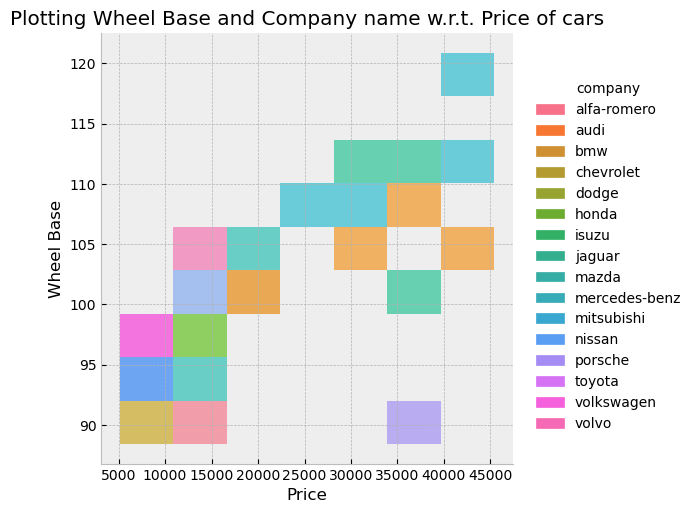

In [20]:
plt.figure(figsize=(8,10))
plt.style.use('bmh')
sns.displot(x='price', y='wheel-base', hue='company', legend=True, data= carsales)
plt.title('Plotting Wheel Base and Company name w.r.t. Price of cars')
plt.xlabel('Price')
plt.ylabel('Wheel Base')
plt.show()

In [21]:
carsales['body-style'].unique()    #list of body-style

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [22]:
carsales['body-style'].value_counts()       #counting the number cars in each body style

sedan          30
hatchback      14
wagon           9
convertible     3
hardtop         2
Name: body-style, dtype: int64

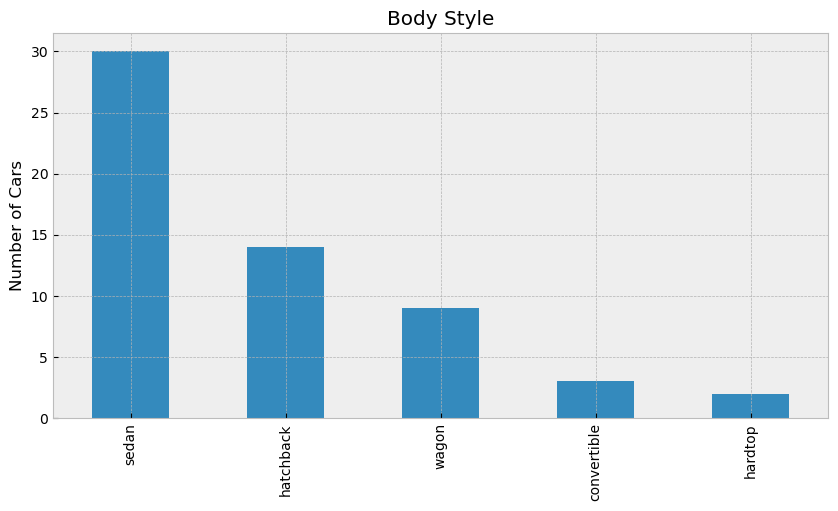

In [23]:
# Visualize body-style data

plt.figure(figsize=(10, 5))
plt.style.use('bmh')
carsales['body-style'].value_counts().plot(kind='bar')
plt.title('Body Style')
plt.ylabel('Number of Cars')
plt.xlabel('')
plt.show()

In [24]:
carsales['length'].unique()    #list of lengths

array([168.8, 171.2, 176.6, 177.3, 192.7, 176.8, 189. , 193.8, 197. ,
       141.1, 155.9, 158.8, 157.3, 157.1, 175.4, 169.1, 170.7, 199.6,
       191.7, 159.1, 169. , 175. , 190.9, 208.1, 199.2, 172.4, 165.3,
       170.2, 184.6, 168.9, 158.7, 169.7, 187.8, 171.7, 188.8])

<Figure size 1000x500 with 0 Axes>

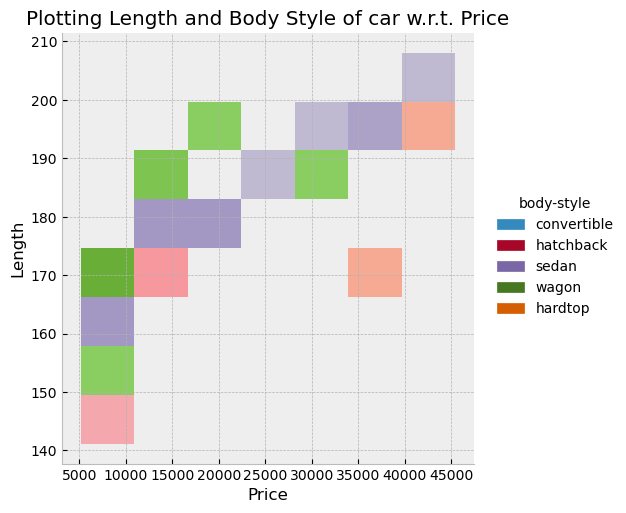

In [25]:
plt.figure(figsize= (10, 5))          #Visualize body-style and length w.r.t price
plt.style.use('bmh')
sns.displot(x='price', y='length', hue='body-style', legend= True, data= carsales)
plt.title('Plotting Length and Body Style of car w.r.t. Price')
plt.xlabel('Price')
plt.ylabel('Length')
plt.show()

In [26]:
carsales['engine-type'].unique()    #list of Company name

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [27]:
carsales['engine-type'].value_counts()        #counting the number cars in each company

ohc      44
dohc      5
ohcv      5
ohcf      2
l         1
rotor     1
Name: engine-type, dtype: int64

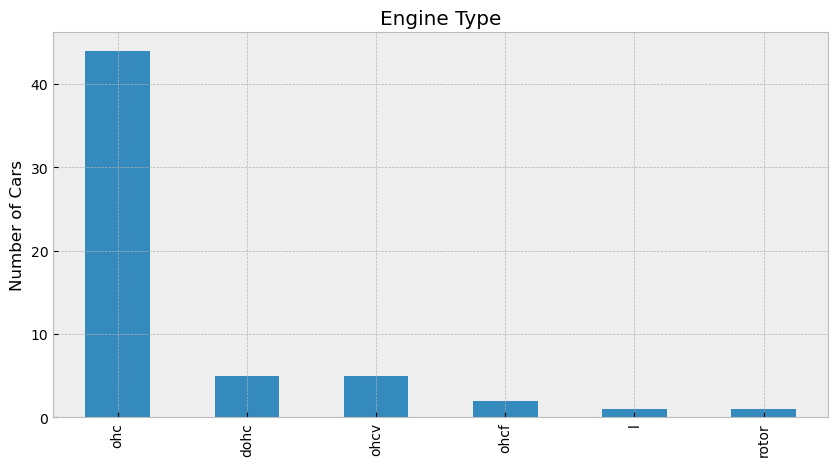

In [28]:
# Visualize body-style data

plt.figure(figsize=(10, 5))
plt.style.use('bmh')
carsales['engine-type'].value_counts().plot(kind='bar')
plt.title('Engine Type')
plt.ylabel('Number of Cars')
plt.xlabel('')
plt.show()

In [29]:
carsales['horsepower'].unique()    #list of Horsepower

array([111, 154, 102, 115, 110, 101, 121, 182,  48,  70,  68,  76, 100,
        78, 176, 262,  72, 123, 184,  88,  55,  69, 152, 207,  62, 156,
        52,  85, 114], dtype=int64)

<Figure size 1000x500 with 0 Axes>

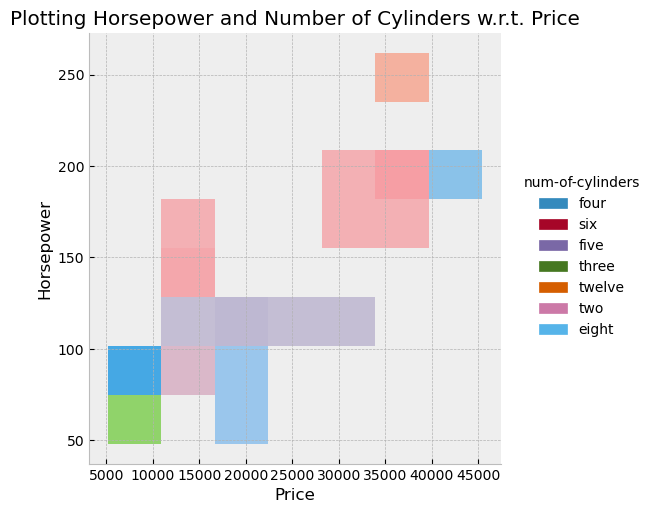

In [30]:
plt.figure(figsize= (10,5))
plt.style.use('bmh')
sns.displot(x= 'price', y= 'horsepower', hue= 'num-of-cylinders', legend= True, data= carsales)
plt.title('Plotting Horsepower and Number of Cylinders w.r.t. Price')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.show()

In [31]:
carsales['num-of-cylinders'].unique()    #list of num-of-cylinders

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [32]:
carsales['num-of-cylinders'].value_counts()

four      37
six       11
five       5
eight      2
three      1
twelve     1
two        1
Name: num-of-cylinders, dtype: int64

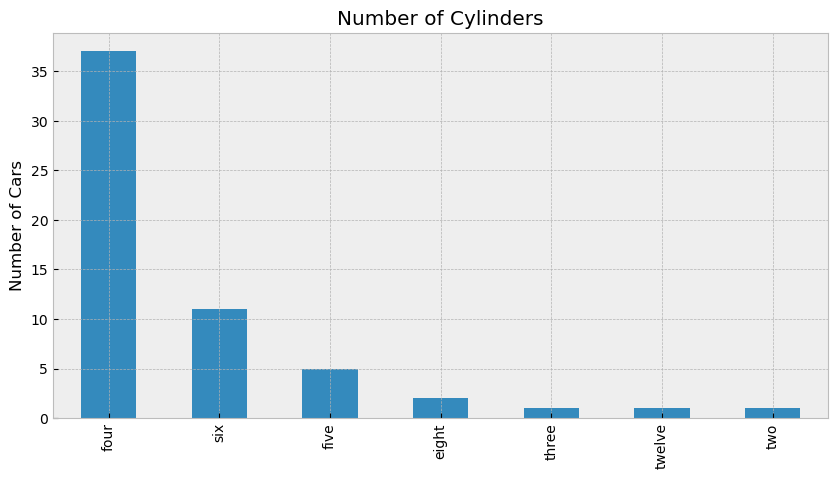

In [33]:
# Visualize num-of-cylinders data

plt.figure(figsize=(10, 5))
plt.style.use('bmh')
carsales['num-of-cylinders'].value_counts().plot(kind='bar')
plt.title('Number of Cylinders')
plt.ylabel('Number of Cars')
plt.xlabel('')
plt.show()

In [34]:
carsales['average-mileage'].unique()    #list of Average Milage

array([21, 19, 24, 18, 23, 16, 15, 47, 38, 31, 30, 25, 13, 17, 22, 14, 37,
       45, 35, 27, 26], dtype=int64)

<Figure size 1000x500 with 0 Axes>

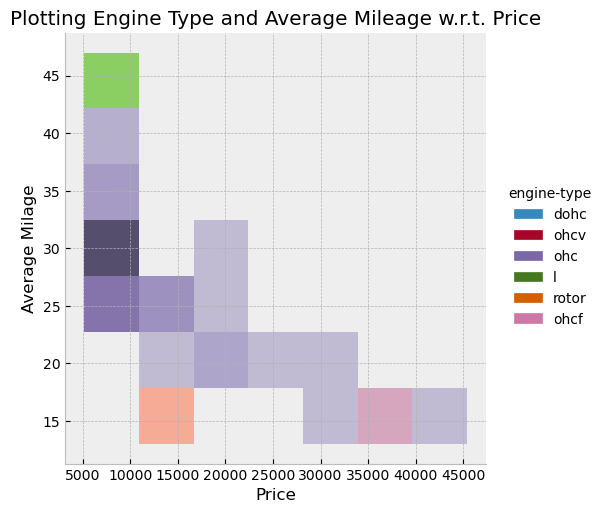

In [35]:
plt.figure(figsize=(10,5))
plt.style.use('bmh')
sns.displot(x= 'price', y= 'average-mileage', hue= 'engine-type', legend= True, data= carsales)
plt.title('Plotting Engine Type and Average Mileage w.r.t. Price')
plt.xlabel('Price')
plt.ylabel('Average Milage')
plt.show()

<Figure size 1500x1800 with 0 Axes>

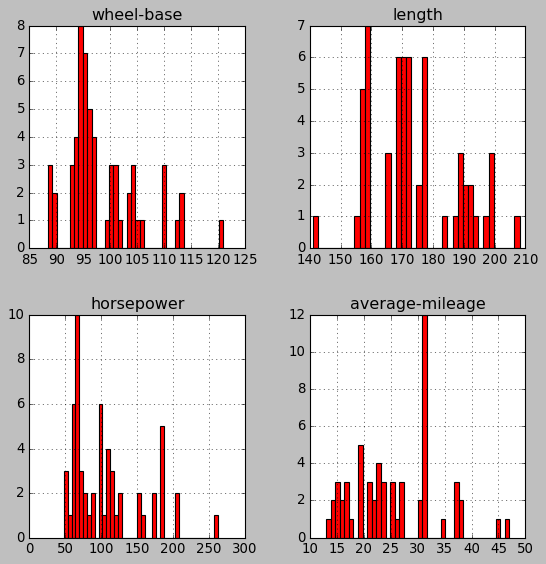

In [36]:
plt.figure(figsize=(15, 18))
plt.style.use('classic')
carsales[['wheel-base', 'length', 'horsepower', 'average-mileage']].hist(bins=40, figsize=(8,8), color='r')
plt.show()

In [37]:
sorting= carsales.sort_values(by='price')
sorting.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
16,chevrolet,hatchback,88.4,141.1,l,three,48,47,5151.0
36,mazda,hatchback,93.1,159.1,ohc,four,68,30,5195.0
66,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
49,mitsubishi,hatchback,93.7,157.3,ohc,four,68,37,5389.0
37,mazda,hatchback,93.1,159.1,ohc,four,68,31,6095.0


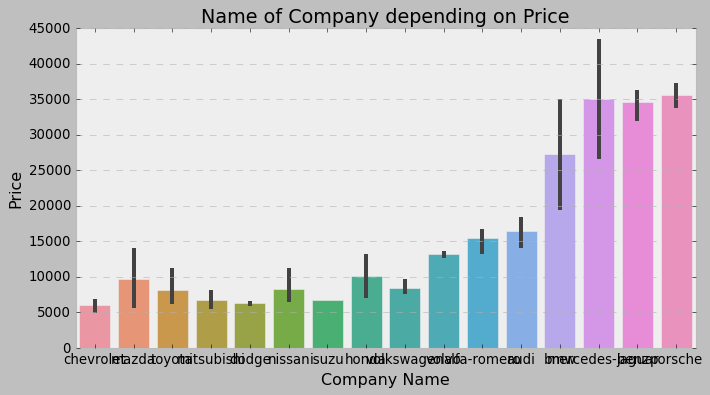

In [38]:
plt.figure(figsize=(10, 5))
plt.style.use('bmh')
sns.barplot(x='company', y='price', data= sorting)
plt.title('Name of Company depending on Price')
plt.xlabel('Company Name')
plt.ylabel('Price')
plt.show()

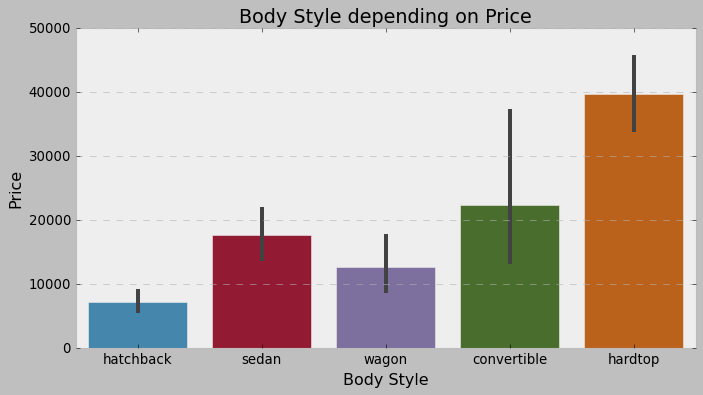

In [39]:
plt.figure(figsize=(10,5))
plt.style.use('bmh')
sns.barplot(x='body-style', y='price', data= sorting)
plt.title('Body Style depending on Price')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.show()

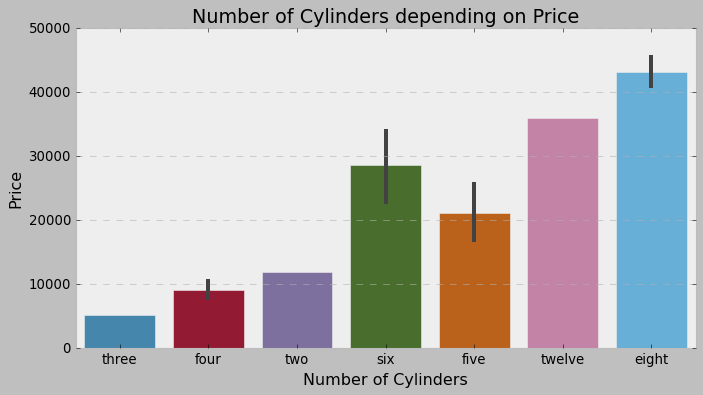

In [40]:
plt.figure(figsize=(10,5))
plt.style.use('bmh')
sns.barplot(x='num-of-cylinders', y='price', data= sorting)
plt.title('Number of Cylinders depending on Price')
plt.xlabel('Number of Cylinders')
plt.ylabel('Price')
plt.show()

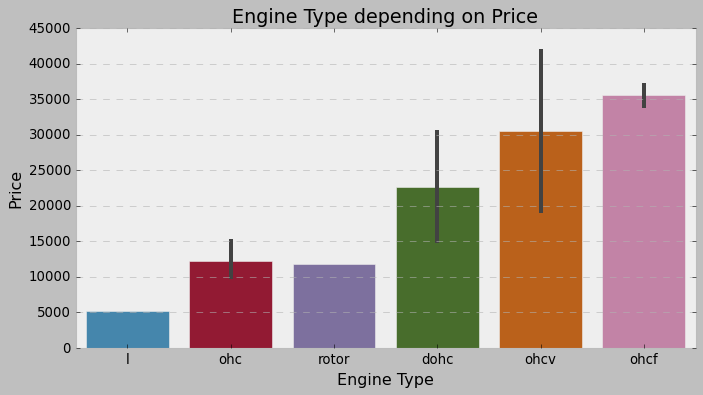

In [41]:
plt.figure(figsize=(10,5))
plt.style.use('bmh')
sns.barplot(x='engine-type', y='price', data= sorting)
plt.title('Engine Type depending on Price')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.show()

In [42]:
#replace company_name,body_style,engine_type,number_of_cylinders in integer number:  
carsold = carsales.replace({"company":{"alfa-romero": 1, "audi": 2, "bmw": 3, "chevrolet": 4, "dodge": 5, "honda": 6, 
                        "isuzu": 7, "jaguar": 8, "mazda": 9, "mercedes-benz": 10, "mitsubishi": 11, "nissan": 12, 
                        "porsche": 13, "toyota": 14, "volkswagen": 15, "volvo": 16 },
            "body-style":{"convertible":1, "hatchback":2, "sedan":3, "wagon":4, "hardtop":5},
            "engine-type":{"dohc":1, "ohcv":2, "ohc":3, "rotor":4, "ohcf":5, "l":6, "dohcv":7},
            "num-of-cylinders":{"two":2, "three":3, "four":4, "five":5, "six":6, "eight":8, "twelve": 12}})
carsold.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,1,1,88.6,168.8,1,4,111,21,13495.0
1,1,1,88.6,168.8,1,4,111,21,16500.0
2,1,2,94.5,171.2,2,6,154,19,16500.0
3,2,3,99.8,176.6,3,4,102,24,13950.0
4,2,3,99.4,176.6,3,5,115,18,17450.0


In [43]:
carsold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           58 non-null     int64  
 1   body-style        58 non-null     int64  
 2   wheel-base        58 non-null     float64
 3   length            58 non-null     float64
 4   engine-type       58 non-null     int64  
 5   num-of-cylinders  58 non-null     int64  
 6   horsepower        58 non-null     int64  
 7   average-mileage   58 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(6)
memory usage: 6.6 KB


In [44]:
carsold.corr().style.background_gradient(cmap='coolwarm')

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
company,1.000000,0.260735,-0.012603,-0.047085,0.125906,-0.097692,-0.187885,0.242883,-0.205502
body-style,0.260735,1.000000,0.445548,0.459589,0.003681,0.248172,0.194081,-0.226987,0.264650
wheel-base,-0.012603,0.445548,1.000000,0.881866,-0.408436,0.516737,0.509146,-0.547084,0.663085
length,-0.047085,0.459589,0.881866,1.000000,-0.466943,0.633069,0.727067,-0.780370,0.788465
engine-type,0.125906,0.003681,-0.408436,-0.466943,1.000000,-0.336496,-0.242157,0.369679,-0.184410
num-of-cylinders,-0.097692,0.248172,0.516737,0.633069,-0.336496,1.000000,0.843596,-0.616336,0.765225
horsepower,-0.187885,0.194081,0.509146,0.727067,-0.242157,0.843596,1.000000,-0.842615,0.901707
average-mileage,0.242883,-0.226987,-0.547084,-0.780370,0.369679,-0.616336,-0.842615,1.000000,-0.770217
price,-0.205502,0.264650,0.663085,0.788465,-0.184410,0.765225,0.901707,-0.770217,1.000000


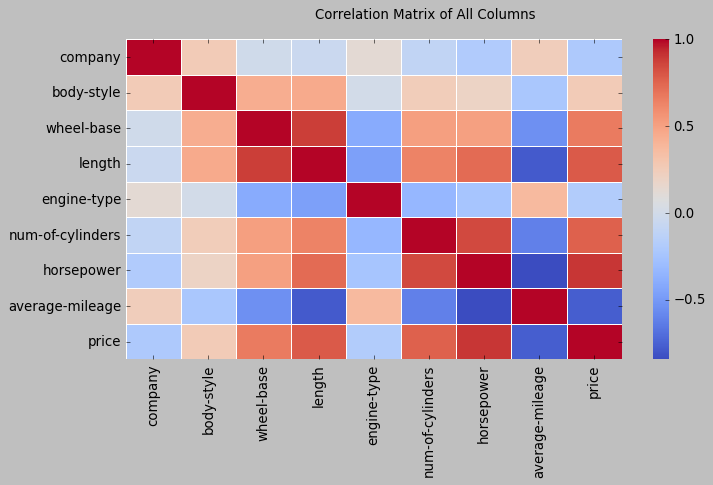

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(data=carsold.corr(), linewidths=0.5, cmap='coolwarm')
plt.suptitle('Correlation Matrix of All Columns')
plt.show()

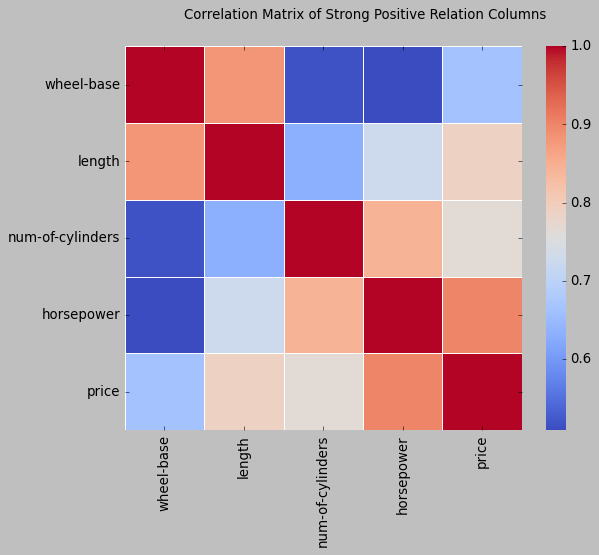

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(data= carsold[['wheel-base', 'length', 'num-of-cylinders', 'horsepower', 'price']].corr(), linewidths=0.5, cmap='coolwarm')
plt.suptitle('Correlation Matrix of Strong Positive Relation Columns')
plt.show()

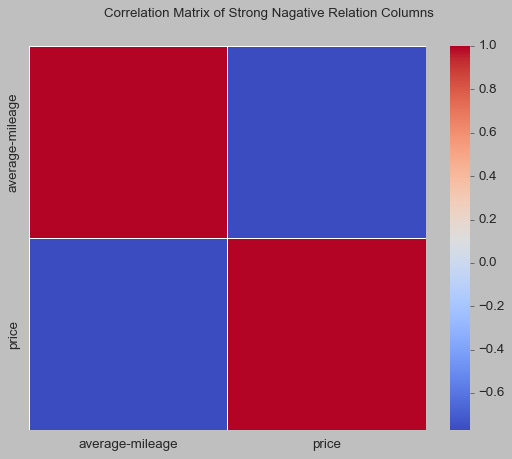

In [47]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.heatmap(data=carsold[['average-mileage', 'price']].corr(), linewidths=0.5, cmap='coolwarm')
plt.suptitle('Correlation Matrix of Strong Nagative Relation Columns')
plt.show()

<Figure size 3200x2000 with 0 Axes>

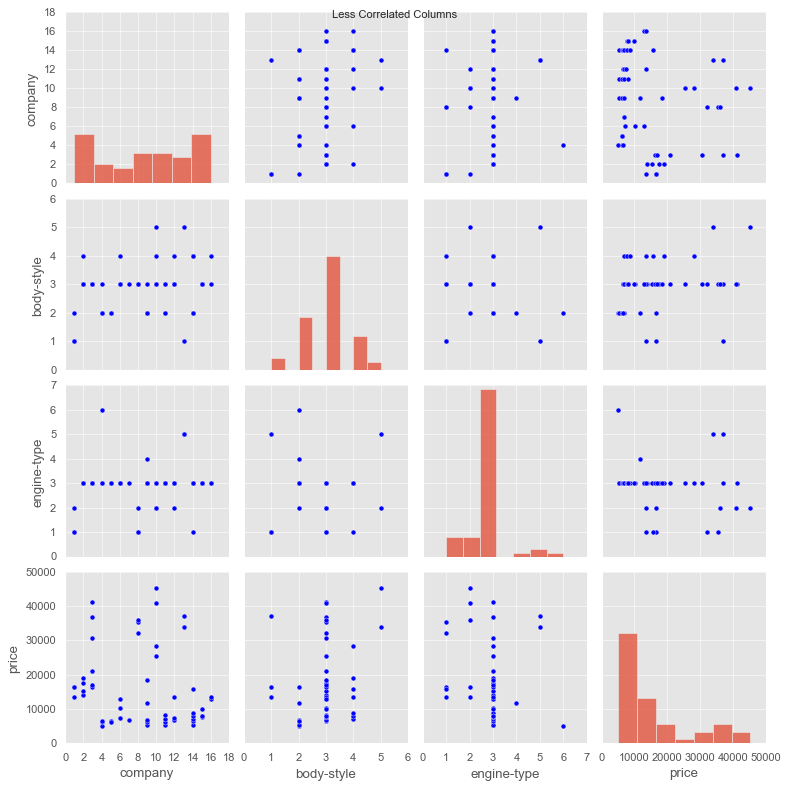

In [48]:
plt.figure(figsize=(40,25))
plt.style.use('ggplot')
sns.pairplot(carsold [['company', 'body-style', 'engine-type', 'price']], kind= 'scatter')
plt.suptitle('Less Correlated Columns')
plt.show()

SETTING TARGET AND FEATURE

In [49]:
feature = carsold.drop('price',  axis=1)
target = carsold['price']

In [50]:
feature.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage
index,,,,,,,,
0,1,1,88.6,168.8,1,4,111,21
1,1,1,88.6,168.8,1,4,111,21
2,1,2,94.5,171.2,2,6,154,19
3,2,3,99.8,176.6,3,4,102,24
4,2,3,99.4,176.6,3,5,115,18


In [51]:
target.head()

index
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

SPLITTING DATA TO TRAIN MODEL

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [53]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=0, shuffle=True)

In [54]:
x_train.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage
index,,,,,,,,
43,9,3,104.9,175.0,3,4,72,31
55,12,3,94.5,165.3,3,4,69,31
46,10,3,120.9,208.1,2,8,184,14
56,12,4,94.5,170.2,3,4,69,31
52,11,3,96.3,172.4,3,4,88,25


In [55]:
x_test.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage
index,,,,,,,,
50,11,2,93.7,157.3,3,4,68,31
49,11,2,93.7,157.3,3,4,68,37
57,12,3,100.4,184.6,2,6,152,19
38,9,2,93.1,159.1,3,4,68,31
14,3,3,103.5,193.8,3,6,182,16


In [56]:
y_train.head()

index
43    18344.0
55     6849.0
46    40960.0
56     7349.0
52     8189.0
Name: price, dtype: float64

In [57]:
y_test.head()

index
50     6189.0
49     5389.0
57    13499.0
38     6795.0
14    41315.0
Name: price, dtype: float64

In [58]:
print('"x_train" Data Shape is : ', x_train.shape)
print('"x_test" Data Shape is : ', x_test.shape)
print('"y_train" Data Shape is : ', y_train.shape)
print('"y_test" Data Shape is : ', x_test.shape)

"x_train" Data Shape is :  (46, 8)
"x_test" Data Shape is :  (12, 8)
"y_train" Data Shape is :  (46,)
"y_test" Data Shape is :  (12, 8)


In [59]:
car_model = LinearRegression()   # Defining the Model

In [60]:
car_model.fit(x_train, y_train)    # Fitting the model in Training Data

LinearRegression()

In [61]:
m = car_model.coef_           # Creating m and c
c = car_model.intercept_

In [62]:
print('"M" of the Model is : ', m)   # Printing m and c
print('"C" of the Model is : ', c)

"M" of the Model is :  [ -163.58669849 -1133.55918127   390.98309862   130.71311689
  1788.10852937  -371.98092752   184.64860163   149.25291909]
"C" of the Model is :  -68130.9891864574


In [63]:
# Predicting Training Data using Linear Model
y_prediction_train = car_model.predict(x_train)

In [64]:
# Predicting Testing Data using Linear Model
y_prediction_test = car_model.predict(x_test)

DETECTING MEAN SQUARED ERROR

In [65]:
print('Mean Squared error of Training Data : ', mean_squared_error(y_train, y_prediction_train))
print('Mean Squared error of Testing Data : ', mean_squared_error(y_test, y_prediction_test))

Mean Squared error of Training Data :  9586058.72553509
Mean Squared error of Testing Data :  32159400.515468284


DETECTING MEAN ABSOLUTE ERROR

In [66]:
print('Mean Absolute error of Training Data : ', mean_absolute_error(y_train, y_prediction_train))
print('Mean Absolute error of Testing Data : ', mean_absolute_error(y_test, y_prediction_test))

Mean Absolute error of Training Data :  2535.4344058855045
Mean Absolute error of Testing Data :  3623.124532697549


MODEL ACCURACY

In [67]:
train_accuracy = r2_score(y_train, y_prediction_train)
print(f'The model training is accurate of {train_accuracy*100:.2f}% .')

The model training is accurate of 90.68% .


In [68]:
test_accuracy = r2_score(y_test, y_prediction_test)
print(f'The model testing is accurate of {test_accuracy*100:.2f}% .')

The model testing is accurate of 83.77% .


VARIFYING MODEL ACCURACY

In [69]:
carsold_training_chart = pd.DataFrame({'Actual': y_train.astype('int'),                         # Formulating Actual vs Predicted Data Frame 
                                       'Predicted' : (y_prediction_train).astype('int'),
                                       'Error' : (y_train - y_prediction_train).astype('int')})

In [70]:
carsold_training_chart.head().style.background_gradient(cmap='coolwarm')

,Actual,Predicted,Error
index,,,
43,18344,12682,5661
55,6849,6304,544
46,40960,37968,2991
56,7349,5811,1537
52,8189,10712,-2523


PLOTTING ACTUAL VS. PREDICTED VALUES

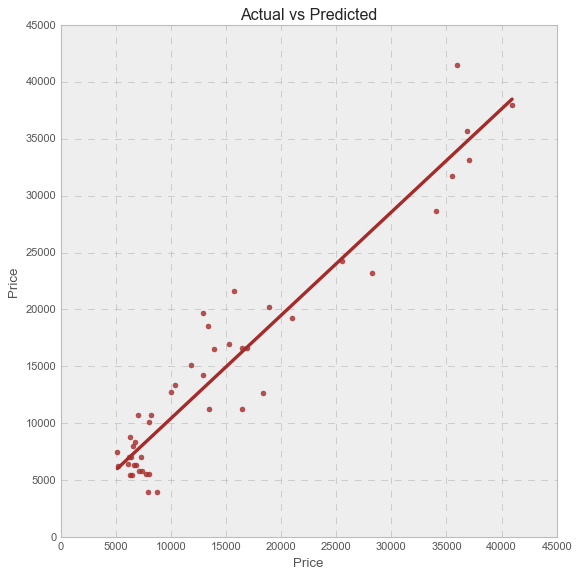

In [71]:
plt.figure(figsize= (8,8))             # Train accuracy policy         
plt.style.use('bmh')
sns.regplot(x= y_train, y= y_prediction_train, color='brown', marker='o', ci=None)
plt.title('Actual vs Predicted')
plt.xlabel('Price')
plt.ylabel('Price')
plt.show()

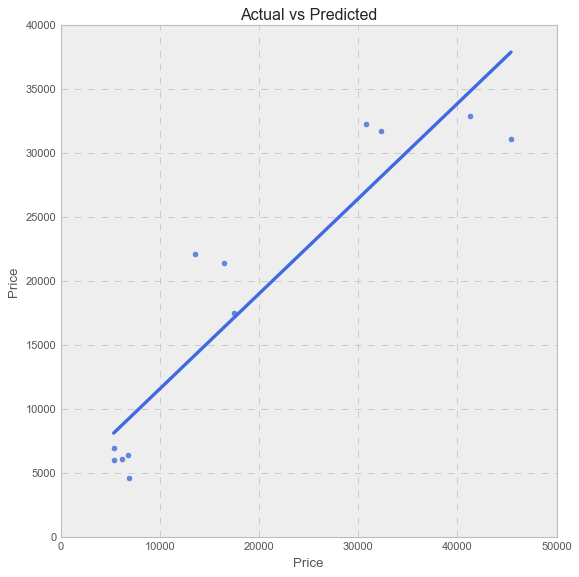

In [72]:
plt.figure(figsize=(8, 8))              # Test accuracy policy
plt.style.use('bmh')
sns.regplot(x=y_test, y=y_prediction_test, color='royalblue', marker='o', ci=None)
plt.title('Actual vs Predicted')
plt.xlabel('Price')
plt.ylabel('Price')
plt.show()

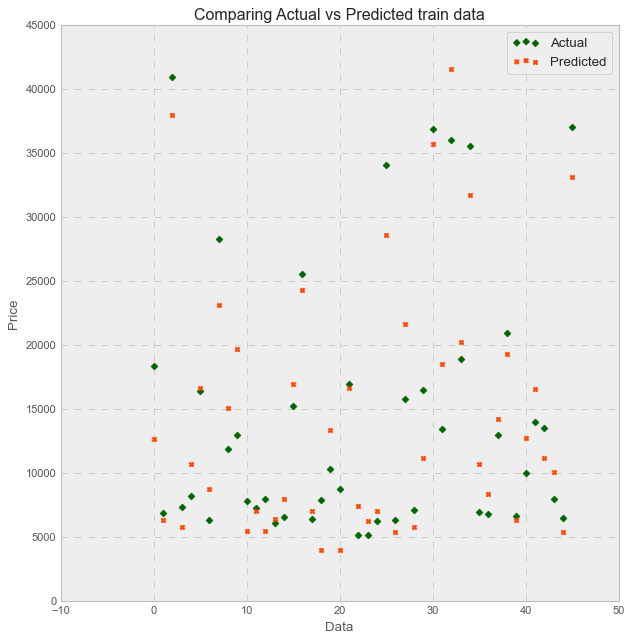

In [73]:
plt.figure(figsize=(9, 9))                  #Plotting actual vs. predicted data on training data
plt.style.use("bmh")
plt.scatter(x=range(46), y= y_train.iloc[:46], color= 'darkgreen', label= 'Actual', marker= 'D')
plt.scatter(x=range(46), y= y_prediction_train[:46], color= 'orangered', label= 'Predicted', marker= 'X')
plt.legend()
plt.ylabel('Price')
plt.xlabel('Data')
plt.title('Comparing Actual vs Predicted train data')
plt.show()

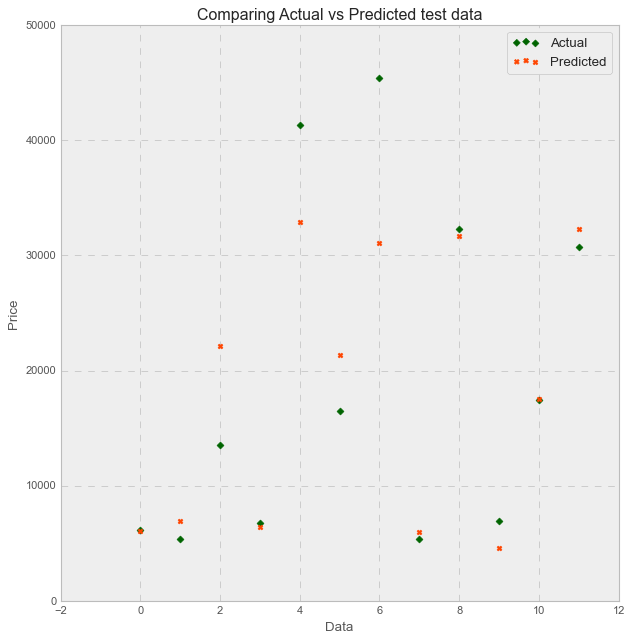

In [74]:
plt.figure(figsize=(9, 9))                 #Plotting actual vs. predicted data on testing data
plt.style.use("bmh")
plt.scatter(x=range(12), y=y_test.iloc[:12], color='darkgreen', label='Actual', marker='D')
plt.scatter(x=range(12), y=y_prediction_test[:12], color='orangered', label='Predicted', marker='X')
plt.legend()
plt.ylabel('Price')
plt.xlabel('Data')
plt.title('Comparing Actual vs Predicted test data')
plt.show()

VISUALIZING Kernel Distribution Estimation (KDE) Plot to COMPARE "ACTUAL" VS. "PREDICTED" TRAIN DATA

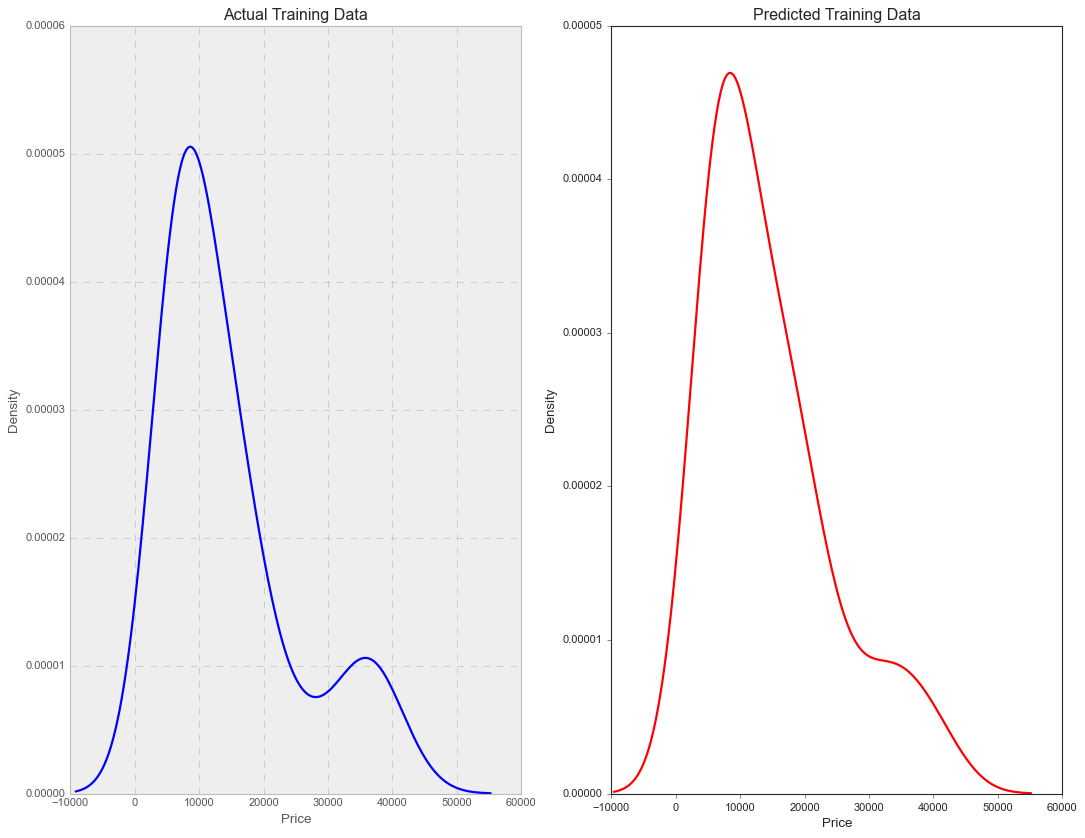

In [75]:
# Actual graph
plt.figure(figsize= (16,12))
plt.subplot(1, 2, 1)
sns.set_style('ticks')
plt.title('Actual Training Data') 
plt.xlabel('Price')
sns.kdeplot(y_train, color='blue')

# Predicted graph
plt.subplot(1, 2, 2)
sns.set_style('ticks')
plt.title('Predicted Training Data')
plt.xlabel('Price')
sns.kdeplot(y_prediction_train, color='red')
plt.show()

plt.close()

VISUALIZING Kernel Distribution Estimation (KDE) Plot TO COMPARE "ACTUAL" VS. "PREDICTED" TEST DATA

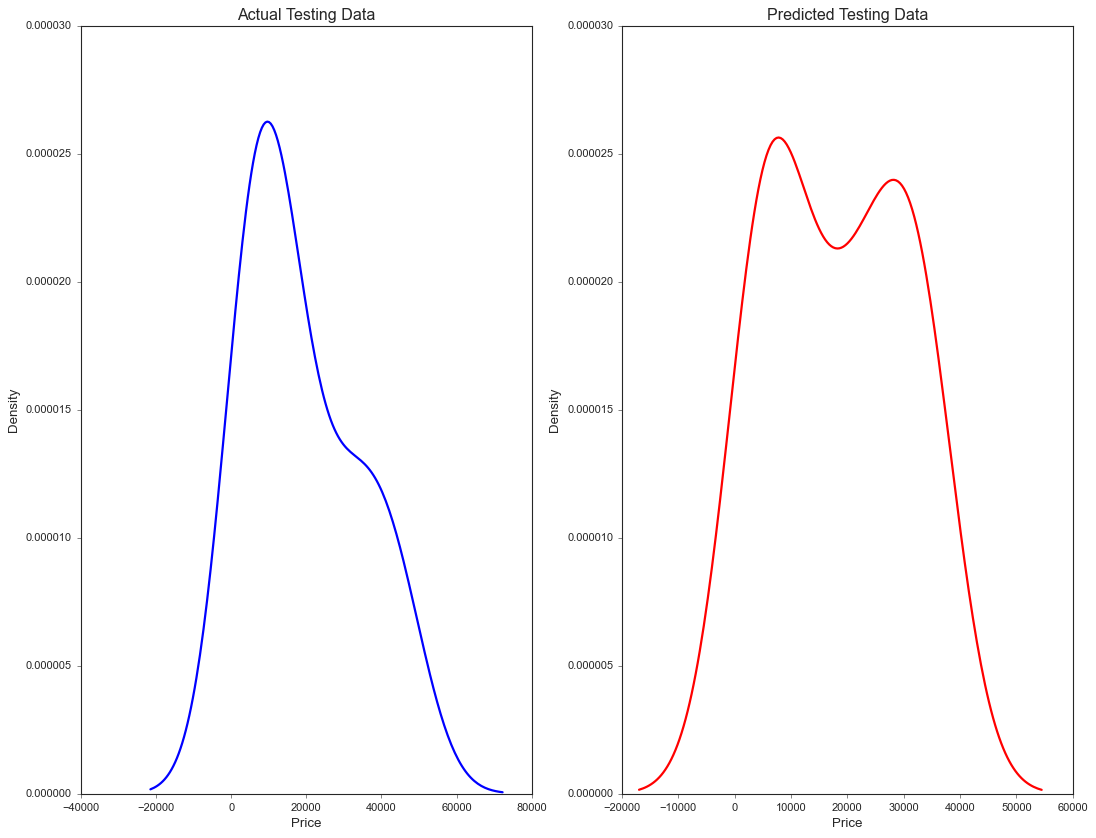

In [76]:
# Actual graph
plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
sns.set_style('ticks')
plt.title('Actual Testing Data')
plt.xlabel('Price')
sns.kdeplot(y_test, color='blue')

# Predicted graph
plt.subplot(1, 2, 2)
sns.set_style('ticks')
plt.title('Predicted Testing Data')
plt.xlabel('Price')
sns.kdeplot(y_prediction_test, color='red')
plt.show()

plt.close()

CONCLUSION OF THE PROJECT

In the above defined model, the accuracy for model training data is 90.68 and model testing data is 83.77% respectively.